In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



---



A1. Write your own functions for the following modules:
a) Summation unit
b) Activation Unit – Step, Bipolar Step, Sigmoid, TanH, ReLU and Leaky ReLU functions
c) Comparator unit for Error calculation


In [11]:
# Summation Unit
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# Activation Functions
#Step function
def step_function(x):
    return 1 if x >= 0 else 0

#bipolar function
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

#sigmoid function
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

#tanh function
def tanh_function(x):
    return np.tanh(x)

#relu function
def relu_function(x):
    return max(0, x)

# leaky relu function
def leaky_relu_function(x, alpha=0.01):
    return x if x >= 0 else alpha * x

# Error Calculation
def mean_squared_error(y_true, y_pred):
    return np.mean((np.array(y_true) - np.array(y_pred))**2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))



#Example
inputs = [0.5, -0.2, 0.1]
weights = [10 , 0.2 ,-0.75]


sum_output = summation_unit(inputs, weights)
print("Summation Output:", sum_output)

# Activation Function Outputs
print("Step Function:", step_function(sum_output))
print("Bipolar Step:", bipolar_step_function(sum_output))
print("Sigmoid:", sigmoid_function(sum_output))
print("TanH:", tanh_function(sum_output))
print("ReLU:", relu_function(sum_output))
print("Leaky ReLU:", leaky_relu_function(sum_output))

# Example error calculations
y_true = [0.5, 0.2, 0.7]
y_pred = [0.4, 0.25, 0.65]

print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))


Summation Output: 4.885
Step Function: 1
Bipolar Step: 1
Sigmoid: 0.9924975878995396
TanH: 0.9998857258255668
ReLU: 4.885
Leaky ReLU: 4.885
Mean Squared Error: 0.004999999999999996
Mean Absolute Error: 0.06666666666666664




---



A2. Develop the above perceptron in your own code (don’t use the perceptron model available from
package). Use the initial weights as provided below.  

Converged in 129 epochs with error: 0


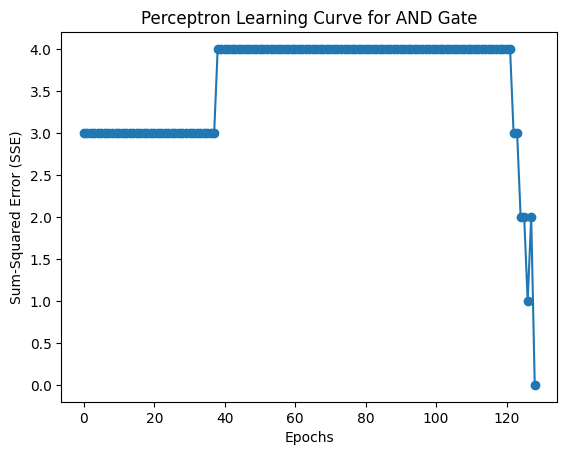

Final Weights: [-0.1   0.1   0.05]


In [12]:


def predict(inputs, weights):
    """Compute the weighted sum and apply the activation function."""
    summation = np.dot(weights, inputs)
    return step_function(summation)

def update_weights(weights, inputs, y_true, y_pred, learning_rate):
    """Apply the perceptron learning rule to update weights."""
    return weights + learning_rate * (y_true - y_pred) * inputs

def calculate_sse(training_data, labels, weights):
    """Calculate the Sum-Squared Error (SSE)."""
    errors = [(labels[i] - predict(training_data[i], weights))**2 for i in range(len(training_data))]
    return sum(errors)

def train_perceptron(training_data, labels, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    """Train the perceptron until convergence or max epochs is reached."""
    weights = np.array([10, 0.2, -0.75])
    epoch_errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(training_data)):
            inputs = training_data[i]
            y_true = labels[i]

            # Make prediction
            y_pred = predict(inputs, weights)

            # Update weights
            weights = update_weights(weights, inputs, y_true, y_pred, learning_rate)

        # Compute SSE error after epoch
        total_error = calculate_sse(training_data, labels, weights)
        epoch_errors.append(total_error)

        # Stop training if error threshold is met
        if total_error <= error_threshold:
            print(f"Converged in {epoch + 1} epochs with error: {total_error}")
            break

    return weights, epoch_errors

# AND Gate Training Data
training_data = np.array([
    [1, 0, 0],  # Bias term = 1
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# AND Gate Expected Outputs
labels = np.array([0, 0, 0, 1])

# Train the perceptron
final_weights, errors = train_perceptron(training_data, labels)

# Plot Error vs Epochs
plt.plot(range(len(errors)), errors, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error (SSE)")
plt.title("Perceptron Learning Curve for AND Gate")
plt.show()

print("Final Weights:", final_weights)




---



3. Repeat the above A1 experiment with following activation functions (write your own code for
activation functions). Compare the iterations taken to converge against each of the activation
functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function

Training with Step activation function...
Converged in 129 epochs with error: 0


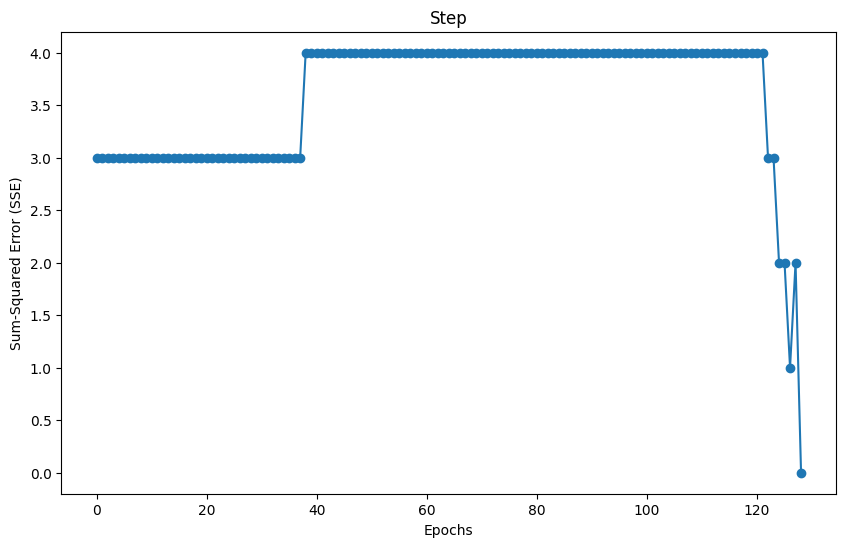

Training with Bipolar Step activation function...


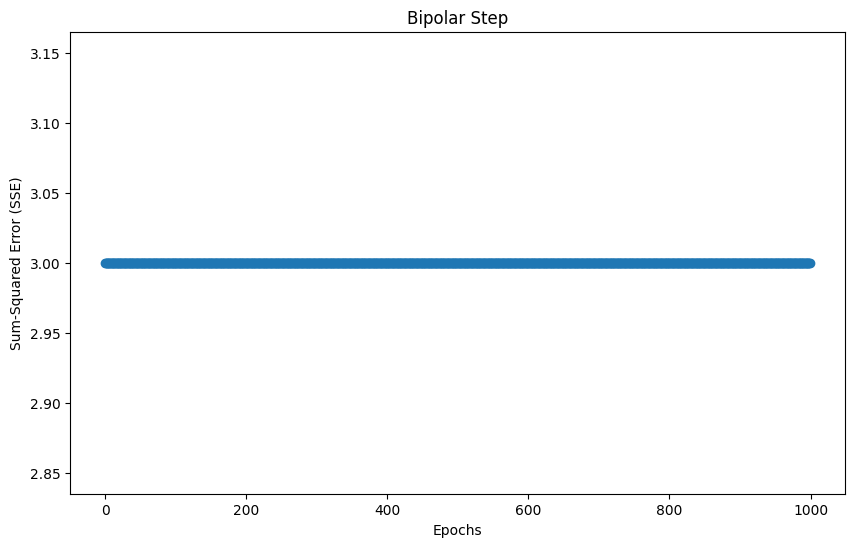

Training with Sigmoid activation function...


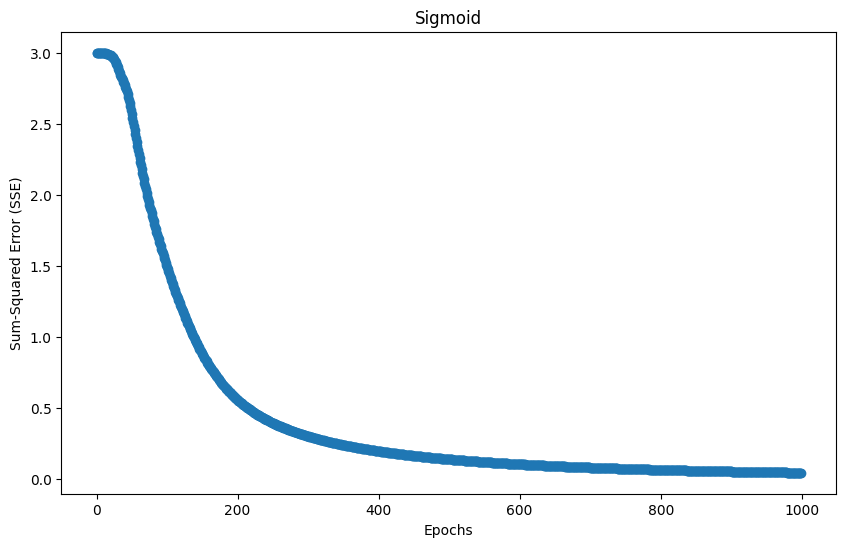

Training with ReLU activation function...
Converged in 383 epochs with error: 0.0019915522002735084


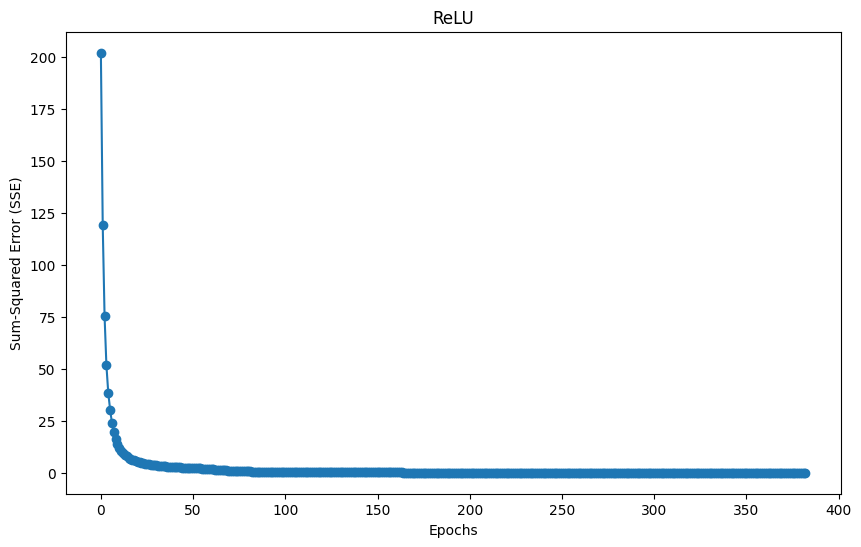

Final Weights for each activation function:
Step: 0 error in 129 epochs
Bipolar Step: 3 error in 1000 epochs
Sigmoid: 0.04122668993310988 error in 1000 epochs
ReLU: 0.0019915522002735084 error in 383 epochs


In [18]:


#Compute the weighted sum and apply the activation function.
def predict(inputs, weights, activation_function):
    summation = np.dot(weights, inputs)
    return activation_function(summation)

#Apply the perceptron learning rule to update weights.
def update_weights(weights, inputs, y_true, y_pred, learning_rate):
    return weights + learning_rate * (y_true - y_pred) * inputs

#Calculate the Sum-Squared Error (SSE).
def calculate_sse(training_data, labels, weights, activation_function):
    errors = [(labels[i] - predict(training_data[i], weights, activation_function))**2 for i in range(len(training_data))]
    return sum(errors)

#Train the perceptron until convergence or max epochs is reached.

def train_perceptron(training_data, labels, activation_function, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    weights = np.array([10, 0.2, -0.75])

    epoch_errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(training_data)):
            inputs = training_data[i]
            y_true = labels[i]

            # Make prediction
            y_pred = predict(inputs, weights, activation_function)

            # Update weights
            weights = update_weights(weights, inputs, y_true, y_pred, learning_rate)

        # Compute SSE error after epoch
        total_error = calculate_sse(training_data, labels, weights, activation_function)
        epoch_errors.append(total_error)

        # Stop training if error threshold is met
        if total_error <= error_threshold:
            print(f"Converged in {epoch + 1} epochs with error: {total_error}")
            break

    return weights, epoch_errors

#Function to plot errors
def plot_errors(errors, title):
    """Plot error vs epochs for different activation functions."""
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(errors)), errors, marker='o', linestyle='-', label=name)

    plt.xlabel("Epochs")
    plt.ylabel("Sum-Squared Error (SSE)")
    plt.title(title)
    plt.show()

# AND Gate Training Data
training_data = np.array([
    [1, 0, 0],  # Bias term = 1
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# AND Gate Expected Outputs
labels = np.array([0, 0, 0, 1])

# Train with Different Activation Functions
activation_functions = {"Step": step_function, "Bipolar Step": bipolar_step_function, "Sigmoid": sigmoid_function, "ReLU": relu_function}
results = {}

for name, func in activation_functions.items():
    print(f"Training with {name} activation function...")
    final_weights, errors = train_perceptron(training_data, labels, func)
    plot_errors(errors , name)
    results[name] = errors

print("Final Weights for each activation function:")
for name, errors in results.items():
    print(f"{name}: {errors[-1]} error in {len(errors)} epochs")




---



A4. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for
learning to converge against the learning rates.

Training with learning rate: 0.1
Training with learning rate: 0.2
Training with learning rate: 0.3
Training with learning rate: 0.4
Training with learning rate: 0.5
Training with learning rate: 0.6
Training with learning rate: 0.7
Training with learning rate: 0.8
Training with learning rate: 0.9
Training with learning rate: 1.0


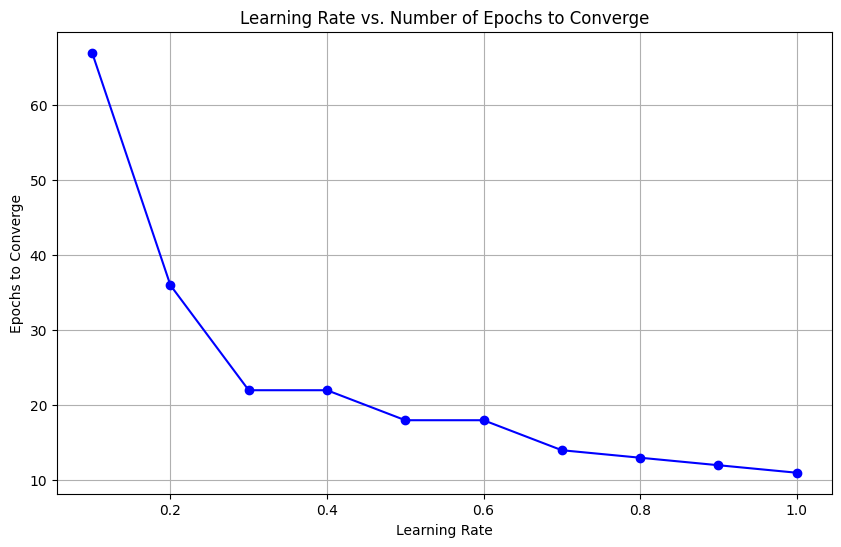

Learning Rate: 0.1, Epochs to Converge: 67
Learning Rate: 0.2, Epochs to Converge: 36
Learning Rate: 0.3, Epochs to Converge: 22
Learning Rate: 0.4, Epochs to Converge: 22
Learning Rate: 0.5, Epochs to Converge: 18
Learning Rate: 0.6, Epochs to Converge: 18
Learning Rate: 0.7, Epochs to Converge: 14
Learning Rate: 0.8, Epochs to Converge: 13
Learning Rate: 0.9, Epochs to Converge: 12
Learning Rate: 1.0, Epochs to Converge: 11


In [17]:
def train_perceptron_max_echos(training_data, labels, activation_function, learning_rate, max_epochs=1000, error_threshold=0.002):
    weights = np.array([10, 0.2, -0.75])  # Fixed initial weights
    epoch_errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(training_data)):
            inputs = training_data[i]
            y_true = labels[i]

            # Make prediction
            y_pred = predict(inputs, weights, activation_function)

            # Update weights
            weights = update_weights(weights, inputs, y_true, y_pred, learning_rate)

        # Compute SSE error after epoch
        total_error = calculate_sse(training_data, labels, weights, activation_function)
        epoch_errors.append(total_error)

        # Stop training if error threshold is met
        if total_error <= error_threshold:
            return epoch + 1  # Return the number of epochs taken to converge

    return max_epochs  # If it doesn't converge, return max_epochs



# AND Gate Training Data
training_data = np.array([
    [1, 0, 0],  # Bias term = 1
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# AND Gate Expected Outputs
labels = np.array([0, 0, 0, 1])

# Define learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Track number of epochs required for convergence for each learning rate
epochs_to_converge = []

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    epochs = train_perceptron_max_echos(training_data, labels, step_function, learning_rate=lr)
    epochs_to_converge.append(epochs)

# Plot Learning Rate vs. Number of Epochs to Converge
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, epochs_to_converge, marker='o', linestyle='-', color='b')
plt.xlabel("Learning Rate")
plt.ylabel("Epochs to Converge")
plt.title("Learning Rate vs. Number of Epochs to Converge")
plt.grid()
plt.show()

# Print the results
for lr, epochs in zip(learning_rates, epochs_to_converge):
    print(f"Learning Rate: {lr}, Epochs to Converge: {epochs}")




---



A5. Repeat the above exercises, A1 to A3, for XOR gate logic.

Training with Step activation function...


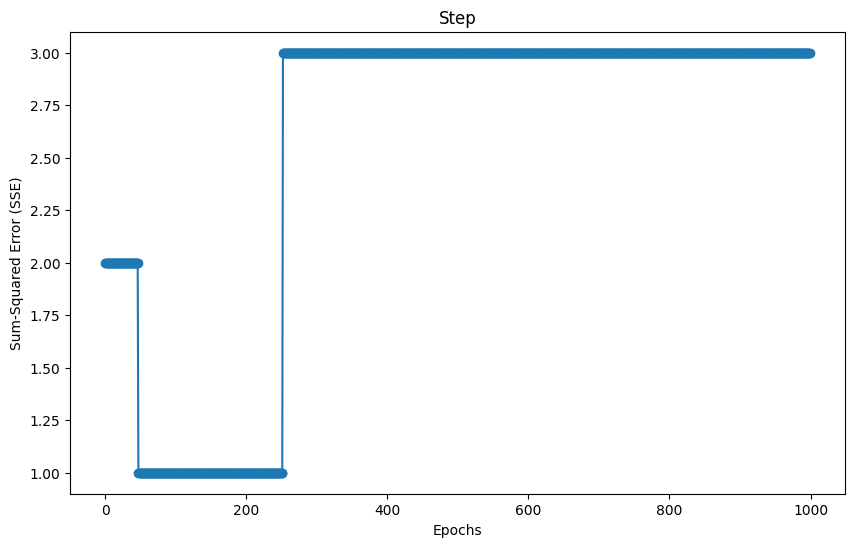

Training with Bipolar Step activation function...


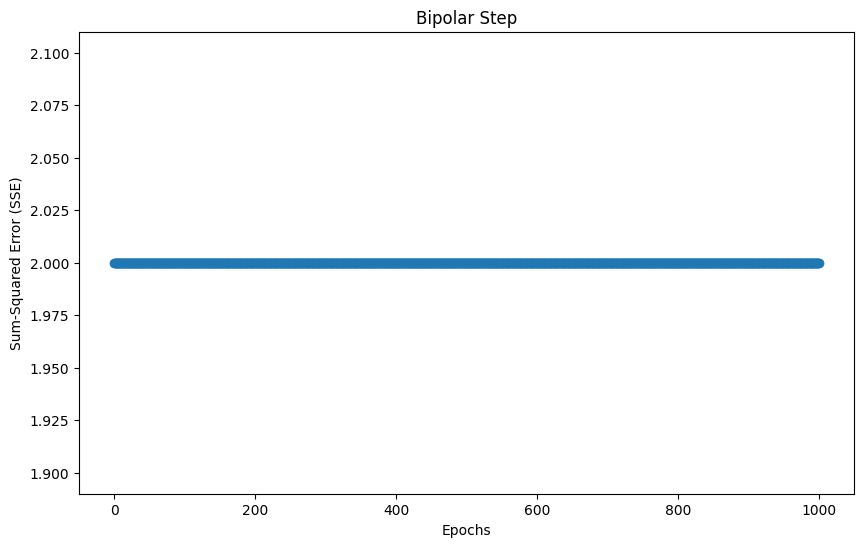

Training with Sigmoid activation function...


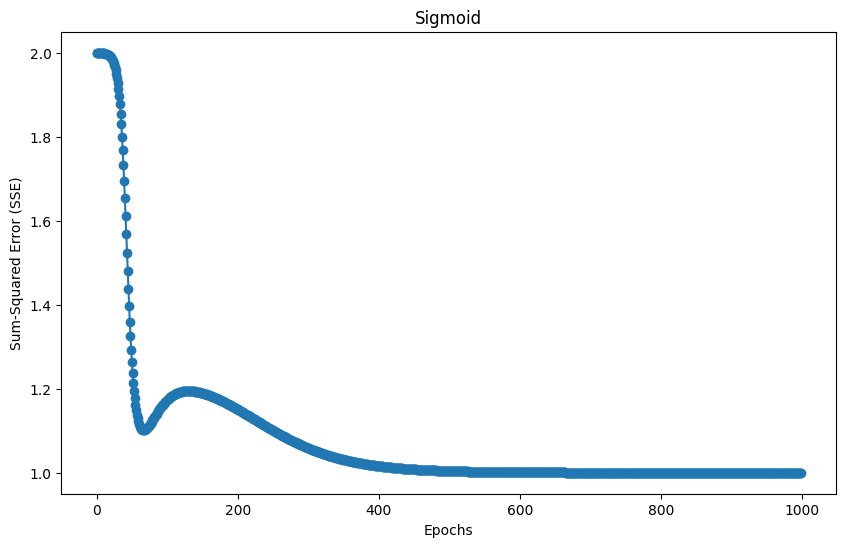

Training with ReLU activation function...


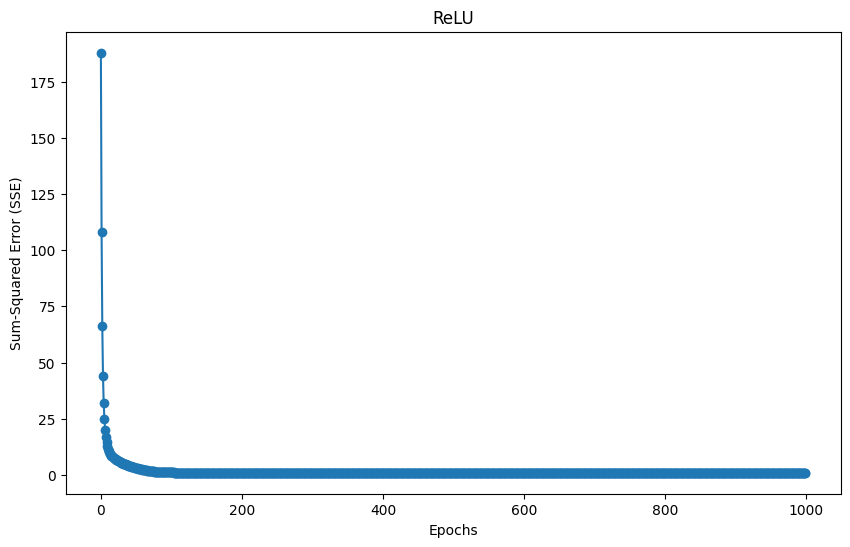

Final Weights for each activation function:
Step: 3 error in 1000 epochs
Bipolar Step: 2 error in 1000 epochs
Sigmoid: 1.0002671061180082 error in 1000 epochs
ReLU: 1.0041551246537441 error in 1000 epochs


In [6]:
# XOR Gate Training Data
training_data = np.array([
    [1, 0, 0],  # Bias term = 1
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# AND Gate Expected Outputs
labels = np.array([0, 1, 1, 0])

# Train with Different Activation Functions
activation_functions = {"Step": step_function, "Bipolar Step": bipolar_step_function, "Sigmoid": sigmoid_function, "ReLU": relu_function}
results = {}

for name, func in activation_functions.items():
    print(f"Training with {name} activation function...")
    final_weights, errors = train_perceptron(training_data, labels, func) #trainning
    plot_errors(errors , name) #plotting the grapg
    results[name] = errors

print("Final Weights for each activation function:")
for name, errors in results.items():
    print(f"{name}: {errors[-1]} error in {len(errors)} epochs")



---



A6. Use customer data provided below. Build a perceptron & learn to classify the transactions as
high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the
weights & learning rate with your choice.

Converged in 320 epochs


<ipython-input-5-45842d140d26>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


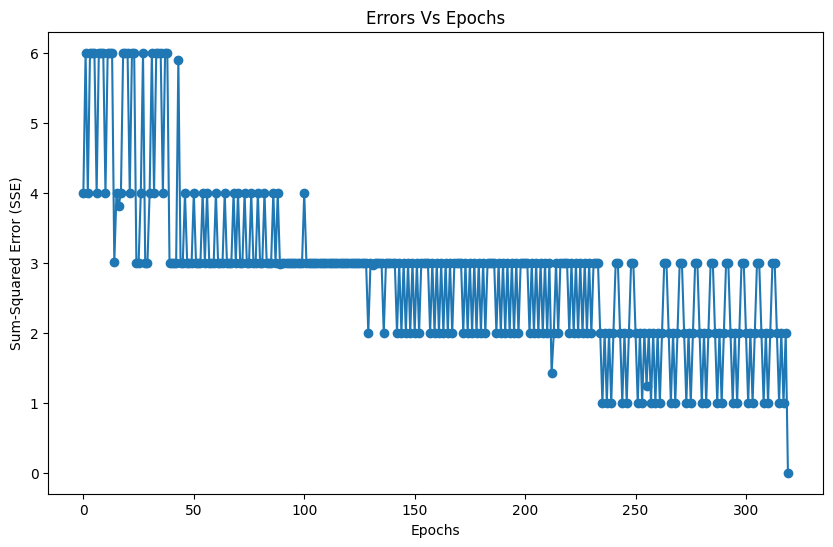

In [10]:
def train_perceptron(training_data, labels, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    num_features = training_data.shape[1]  # Get the correct number of features
    weights = np.random.rand(num_features)  # Initialize weights
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for inputs, target in zip(training_data, labels):
            prediction = predict(inputs, weights,sigmoid_function)
            error = target - prediction
            total_error += error ** 2
            weights += learning_rate * error * inputs  # Update weights correctly
        errors.append(total_error)

        if total_error <= error_threshold:
            print(f"Converged in {epoch+1} epochs")
            break
    return weights, errors


# Customer transaction dataset (with bias term added)
training_data = np.array([
    [1, 20, 6, 2, 386],
    [1, 16, 3, 6, 289],
    [1, 27, 6, 2, 393],
    [1, 19, 1, 2, 110],
    [1, 24, 4, 2, 280],
    [1, 22, 1, 5, 167],
    [1, 15, 4, 2, 271],
    [1, 18, 4, 2, 274],
    [1, 21, 1, 4, 148],
    [1, 16, 2, 4, 198]
])

# Convert 'Yes' to 1 and 'No' to 0
labels = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Train the perceptron with Sigmoid Activation
learning_rate = 0.05
final_weights, errors = train_perceptron(training_data, labels, learning_rate)

# Plot Error vs Epochs
plot_errors(errors , "Errors Vs Epochs")




---



A7. Compare the results obtained from above perceptron learning to the ones obtained with matrix
pseudo-inverse.

In [11]:
def pseudo_inverse_method(training_data, labels):
    pseudo_inv = np.linalg.pinv(training_data)  # Compute pseudo-inverse
    weights = np.dot(pseudo_inv, labels)  # Compute optimal weights
    return weights

#Compute pseudo inverse
final_weights_pseudo = pseudo_inverse_method(training_data, labels)

# Compare results
print("Final Weights from Perceptron Learning:", final_weights)
print("Final Weights from Pseudo-Inverse Method:", final_weights_pseudo)



Final Weights from Perceptron Learning: [ -13.74403703 -238.50722184   32.22281371  -81.58541979   20.33037315]
Final Weights from Pseudo-Inverse Method: [ 0.1139903  -0.02789923  0.01473739 -0.04323249  0.00447248]




---



A8. Develop the below Neural Network. Use learning rate (α) = 0.05 with a Sigmoid activation
function. Learn the weights of the network using back-propagation algorithm to implement above
provided AND gate logic.

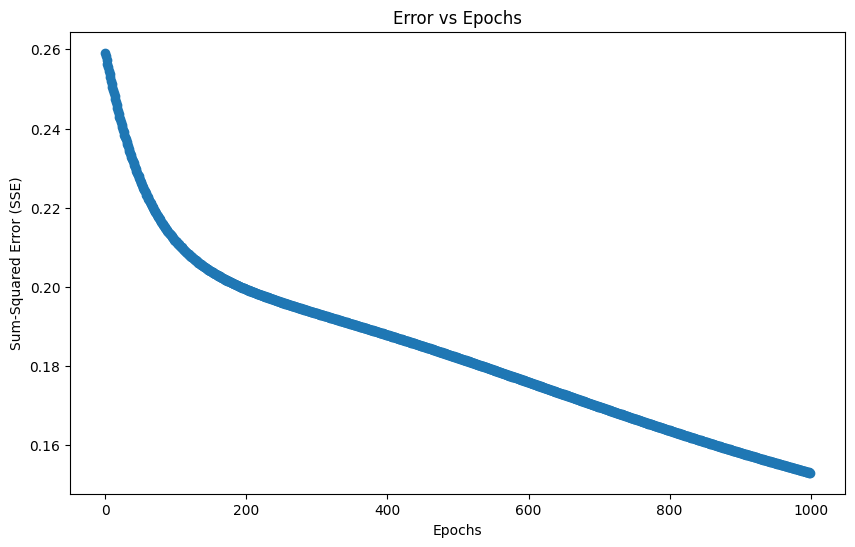

In [13]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def train_neural_network(X, y, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    np.random.seed(0)
    # Initialize weights randomly
    v = np.random.uniform(-1, 1, (2, 2))  # Weights from input to hidden layer
    w = np.random.uniform(-1, 1, (2, 1))  # Weights from hidden to output layer

    errors = []

    for epoch in range(max_epochs):
        # Forward Propagation
        hidden_input = np.dot(X, v)
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, w)
        final_output = sigmoid(final_input)

        # Compute error
        error = y - final_output
        sum_squared_error = np.mean(error ** 2)
        errors.append(sum_squared_error)

        if sum_squared_error <= error_threshold:
            print(f"Converged in {epoch+1} epochs")
            break

        # Backward Propagation
        d_output = error * sigmoid_derivative(final_output)
        d_hidden = np.dot(d_output, w.T) * sigmoid_derivative(hidden_output)

        # Update Weights
        w += learning_rate * np.dot(hidden_output.T, d_output)
        v += learning_rate * np.dot(X.T, d_hidden)

    return v, w, errors

 # AND Gate Inputs and Outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Train Neural Network
v, w, errors = train_neural_network(X, y)

# Plot Error vs Epochs
plot_errors(errors,"Error vs Epochs")




---



A9.Repeat the above A8 experiment for XOR Gate logic. Keep the learning rate & activation function
same as A8.

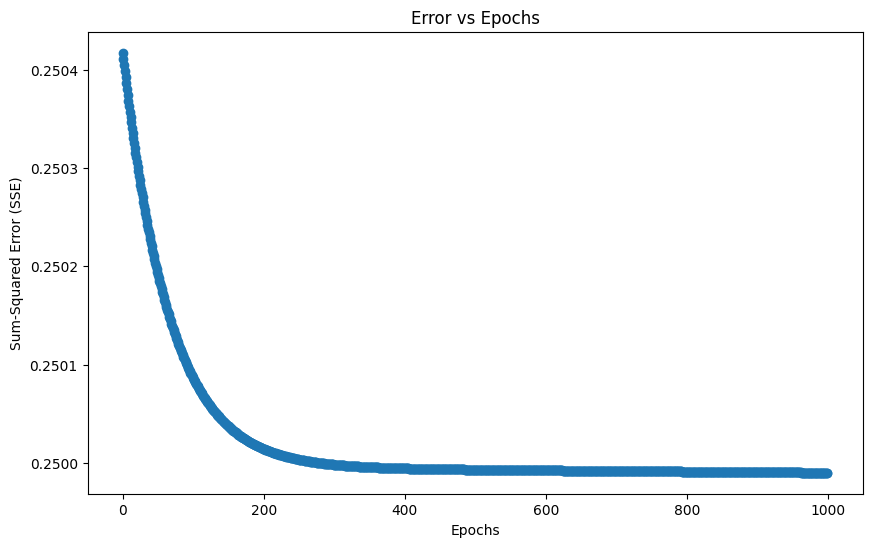

In [14]:
 # XOR Gate Inputs and Outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train Neural Network
v, w, errors = train_neural_network(X, y)

# Plot Error vs Epochs
plot_errors(errors,"Error vs Epochs")



---



A10. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate
maps to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1].

In [18]:
import numpy as np

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid (For Backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Input (AND/XOR Gate)
X = np.array([[0,0], [0,1], [1,0], [1,1]])

# One-hot encoded target for AND Gate
Y_AND = np.array([[1,0], [1,0], [1,0], [0,1]])

# One-hot encoded target for XOR Gate
Y_XOR = np.array([[1,0], [0,1], [0,1], [1,0]])

# Initialize Weights randomly
np.random.seed(1)
V = np.random.uniform(-1, 1, (2,2))  # Input to Hidden layer weights (2x2)
W = np.random.uniform(-1, 1, (2,2))  # Hidden to Output layer weights (2x2)

# Learning rate & parameters
alpha = 0.05
max_iter = 1000
error_threshold = 0.002

def train_nn(Y, gate_name):
    global V, W
    for epoch in range(max_iter):
        total_error = 0

        for i in range(len(X)):
            # Forward Pass
            A = X[i].reshape(1,2)  # Input layer
            net_H = np.dot(A, V)  # Net input to hidden layer
            H = sigmoid(net_H)  # Output from hidden layer

            net_O = np.dot(H, W)  # Net input to output layer
            O = sigmoid(net_O)  # Output layer

            # Compute Error
            error = Y[i] - O
            total_error += np.sum(error**2)

            # Backpropagation
            delta_O = error * sigmoid_derivative(O)
            delta_H = np.dot(delta_O, W.T) * sigmoid_derivative(H)

            # Update Weights
            W += alpha * np.dot(H.T, delta_O)
            V += alpha * np.dot(A.T, delta_H)

        # Stop if error is below threshold
        if total_error <= error_threshold:
            print(f"Converged at epoch {epoch+1} for {gate_name}")
            break

    print(f"Final Error ({gate_name}): {total_error}")

# Train for AND Gate
train_nn(Y_AND, "AND Gate")

# Train for XOR Gate
train_nn(Y_XOR, "XOR Gate")


Final Error (AND Gate): 1.0514740221692456
Final Error (XOR Gate): 1.7426251714164755




---



A11. Learn using a MLP network from Sci-Kit manual available at https://scikit
learn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate
exercises using MLPClassifier() function.

In [16]:
# Define input-output pairs for AND and XOR gates
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y_AND = np.array([0, 0, 0, 1])  # AND gate labels
Y_XOR = np.array([0, 1, 1, 0])  # XOR gate labels

# Train MLP for AND Gate
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=1000, random_state=1)
mlp_and.fit(X, Y_AND)
Y_pred_and = mlp_and.predict(X)

# Train MLP for XOR Gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=1000, random_state=1)
mlp_xor.fit(X, Y_XOR)
Y_pred_xor = mlp_xor.predict(X)

# Evaluate the models
print(f"AND Gate Accuracy: {accuracy_score(Y_AND, Y_pred_and)}")
print(f"XOR Gate Accuracy: {accuracy_score(Y_XOR, Y_pred_xor)}")

# Print learned weights
print("AND Gate Weights:\n", mlp_and.coefs_)
print("XOR Gate Weights:\n", mlp_xor.coefs_)


AND Gate Accuracy: 1.0
XOR Gate Accuracy: 0.5

AND Gate Weights:
 [array([[-3.6551365 , -1.263927  ],
       [-3.42361542, -1.94671255]]), array([[-7.72323782],
       [-2.91864725]])]

XOR Gate Weights:
 [array([[-0.17357289,  0.29767724],
       [-0.72723512, -0.28236441]]), array([[-0.40252921],
       [-0.09947343]])]




---




A12. Use the MLPClassifier() function on your project dataset.

In [8]:
# Load dataset (Assuming it's a CSV file)
df = pd.read_excel("/content/bert_features_output.xlsx")



# Define features and labels
feature_columns = [f'bert_feat_{i}' for i in range(768)]
X = df[feature_columns].values  # Convert to NumPy array
y = df['label'].values  # Target labels (0 or 1)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (MLP performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.8165
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1008
           1       0.82      0.81      0.81       992

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

